# DC Superheroes Data Analysis

bla bla bla

Data comes from : https://www.kaggle.com/datasets/mohitbansal31s/dc-characters?resource=download

kaggle csv download, original poster scraped data from DC Fandom.

## Data Frame Creation

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

dc_df = pd.read_csv('dc_characters_dataset.csv')
dc_df.head()

,Unnamed: 0,PageID,Name,Universe,URL,Identity,Gender,Marital Status,Teams,Weight (kg),Creators
0,0,2-6-8-1-7-9-5_(DC_Super_Hero_Girls),2-6-8-1-7-9-5,DC Super Hero Girls,https://dc.fandom.com/wiki/2-6-8-1-7-9-5_(DC_S...,Public,Female,Single,Green Lantern Corps,NaN,Billy Tan; Robert Venditti
1,1,2-6-8-1-7-9-5_(Prime_Earth),2-6-8-1-7-9-5,Prime Earth,https://dc.fandom.com/wiki/2-6-8-1-7-9-5_(Prim...,Public,Female,Single,Green Lantern Corps,NaN,Billy Tan; Robert Venditti
2,2,2-Face-2_(Batman_in_Bethlehem),2-Face-2,Batman in Bethlehem,https://dc.fandom.com/wiki/2-Face-2_(Batman_in...,NaN,Male,NaN,NaN,NaN,Andy Kubert; Grant Morrison
3,3,3g4_(New_Earth),3g4,New Earth,https://dc.fandom.com/wiki/3g4_(New_Earth),NaN,Male,NaN,NaN,NaN,Jim Calafiore; Peter David
4,4,7-Gorn-7_(Teen_Titans_TV_Series),7-Gorn-7,Teen Titans TV Series,https://dc.fandom.com/wiki/7-Gorn-7_(Teen_Tita...,Public,NaN,NaN,Control Freak,NaN,David Slack


## Data Cleaning

I have decided for the purposes of my study to keep characters with duplicate names because althought they are the same character they are from different universes and therefore may have different roles in their respective universe. I think it is also important to see which characters recieve alternate versions accross different franchises and media. I am correcting the "Gender" column for rows: 22965 and 25728, as well as combining the lowercase "male" and "female" categories with the uppercase versions. For simplicity I will delete the 414 rows that have no value for the gender column. Most were characters already listed with a gender in the data or were characters that had no gender.

In [23]:
#removing columns unnecessary for visualizations and report

dc_df.drop(columns=["URL", "Weight (kg)", "Unnamed: 0", "PageID"], inplace=True)
dc_df.dropna(subset=["Gender"], inplace=True)

dc_df["Gender"] = dc_df["Gender"].replace({"Genderless": "Genderless or Non-binary", "Non-binary": "Genderless or Non-binary"})
dc_df["Gender"] = dc_df["Gender"].replace({"male": "Male", "female": "Female"})
dc_df["Gender"] = dc_df["Gender"].replace({"Good": "Male", "New Earth": "Female"})
dc_df["Marital Status"] = dc_df["Marital Status"].replace({"[[:Category:> Characters|>]][[Category:> Characters|Edwin Alva (Earth M)]]": "Widowed"})
dc_df["Marital Status"] = dc_df["Marital Status"].replace({"Good": np.nan})
dc_df.head()

,Name,Universe,Identity,Gender,Marital Status,Teams,Creators
0,2-6-8-1-7-9-5,DC Super Hero Girls,Public,Female,Single,Green Lantern Corps,Billy Tan; Robert Venditti
1,2-6-8-1-7-9-5,Prime Earth,Public,Female,Single,Green Lantern Corps,Billy Tan; Robert Venditti
2,2-Face-2,Batman in Bethlehem,NaN,Male,NaN,NaN,Andy Kubert; Grant Morrison
3,3g4,New Earth,NaN,Male,NaN,NaN,Jim Calafiore; Peter David
5,50% Chad,Prime Earth,Secret,Male,Single,Brotherhood of Nada,Gerard Way; Nick Derington


## Visualization

In [24]:
#sns.countplot(x="Gender", data = dc_df)
counts = dc_df["Gender"].value_counts()
counts



Gender
Male                        22040
Female                       8843
Genderless or Non-binary      165
Intersex                        3
Name: count, dtype: int64

In [25]:
counts = dc_df["Marital Status"].value_counts()
counts

Marital Status
Single     13092
Married     2389
Widowed      780
Engaged      106
Name: count, dtype: int64

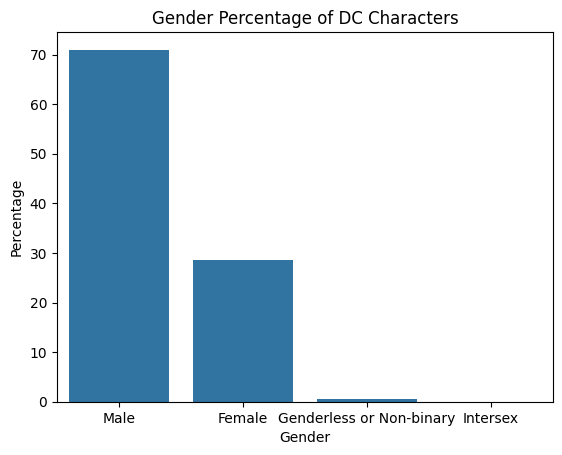

In [27]:
# I am converting my counts to percentages because I believe it makes 
# the visualization more relative and easier to understand and compare
gender_counts = dc_df['Gender'].value_counts(normalize = True)*100

sns.barplot(x = gender_counts.index, y = gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Percentage of DC Characters')
plt.show()



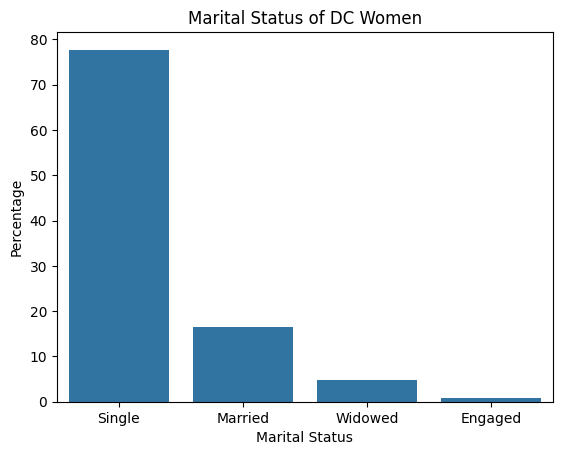

In [28]:
female_characters = dc_df[dc_df["Gender"] == "Female"]

# I am converting my counts to percentages because I believe it makes 
# the visualization more relative and easier to understand and compare
marital_counts = female_characters['Marital Status'].value_counts(normalize = True)*100

sns.barplot(x = marital_counts.index, y = marital_counts.values)

plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Marital Status of DC Women')
plt.show()

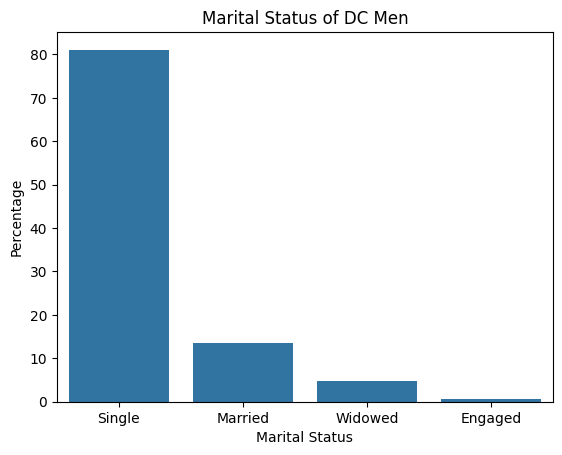

In [29]:
male_characters = dc_df[dc_df["Gender"] == "Male"]

# I am converting my counts to percentages because I believe it makes 
# the visualization more relative and easier to understand and compare
marital_counts = male_characters['Marital Status'].value_counts(normalize = True)*100

sns.barplot(x = marital_counts.index, y = marital_counts.values)

plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Marital Status of DC Men')
plt.show()